In [1]:
from __future__ import division, unicode_literals, print_function  # for compatibility with Python 2 and 3

import matplotlib as mpl
import matplotlib.pyplot as plt

# change the following to %matplotlib notebook for interactive plotting
%matplotlib inline

# Optionally, tweak styles.
mpl.rc('figure',  figsize=(10, 10))
mpl.rc('image', cmap='gray')

In [2]:
import numpy as np
import pandas as pd
from pandas import DataFrame, Series  # for convenience

import pims
import trackpy as tp
import av
import moviepy
import imageio

In [3]:
##reads in sequence of images
##use pims.Video for videos but it is buggy
frames = pims.ImageSequence('C:/Users/Jayson/Documents/College/Microbots - ML/trackpy/disso1-is/*.jpg')

In [4]:
##converts frames to grey scale
@pims.pipeline
def as_grey(frame):
    red = frame[:, :, 0]
    green = frame[:, :, 1]
    blue = frame[:, :, 2]
    return 0.2125 * red + 0.7154 * green + 0.0721 * blue

In [5]:
frames = as_grey(frames)

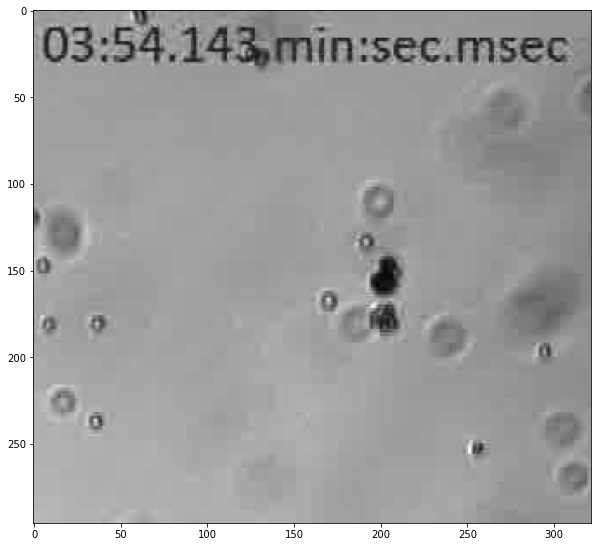

In [6]:
##101st frame
plt.imshow(frames[101])

In [7]:
##info of the frames
frames

(ImageSequence,) processed through proc_func. Original repr:
    <Frames>
    Source: C:\Users\Jayson\Documents\College\Microbots - ML\trackpy\disso1-is\*.jpg
    Length: 199 frames
    Frame Shape: (296, 322, 3)
    Pixel Datatype: uint8

In [8]:
print(frames[0])

[[66.8152 67.8989 69.9221 ... 72.     72.     72.    ]
 [69.548  70.1288 70.     ... 72.     72.     72.    ]
 [72.0683 72.3587 71.4366 ... 72.     71.     71.    ]
 ...
 [68.     69.     69.     ... 70.     71.     71.    ]
 [68.     69.     69.     ... 69.     71.     71.    ]
 [68.     69.     69.     ... 69.     71.     71.    ]]


In [9]:
##takes in a frame, max size of the particle diameter-wise, invert = true bc features are darker than background
##returns a dataframe with potential particles
f = tp.locate(frames[0], 13, invert=True)

In [10]:
##.head shows first few rows of pandas dataframe
f.head()

,y,x,mass,size,ecc,signal,raw_mass,ep,frame
0,11.513281,67.996411,222.180566,3.444567,0.490219,8.134393,-7175.5336,0.187160,0
1,11.392385,12.717172,205.273789,3.864548,0.544283,5.741924,-6685.0359,0.088344,0
2,12.486996,30.239462,177.840152,3.654594,0.451273,5.582426,-6894.5684,0.114072,0
3,11.833013,50.168266,249.295208,3.622105,0.423509,8.612886,-7264.5866,0.234854,0
4,11.813486,84.494261,222.340064,3.461305,0.440072,8.134393,-7157.3394,0.179704,0


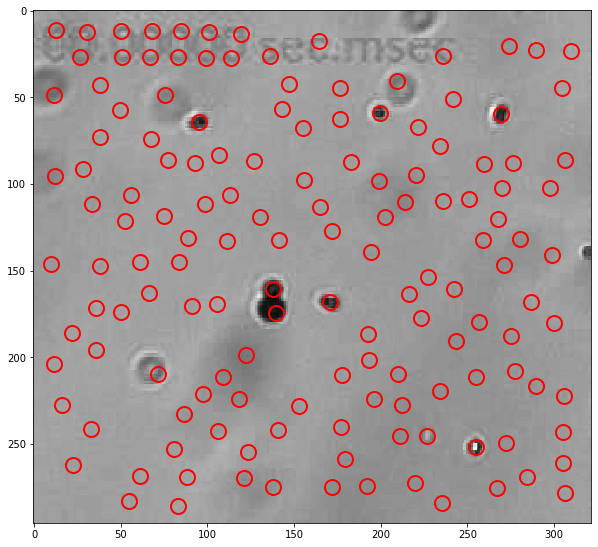

<AxesSubplot:>

In [11]:
plt.figure()  # make a new figure
##annotate searches for the particles and circles them
##this is just the first frame
tp.annotate(f, frames[0])

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

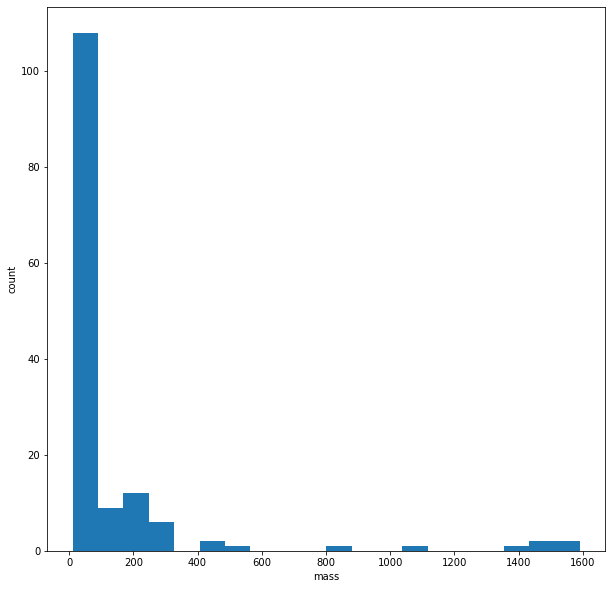

In [12]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
##plots the 'mass' of each detected particle
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [13]:
f = tp.locate(frames[0], 13, invert=True, minmass=450)
##set min 'mass' to 450

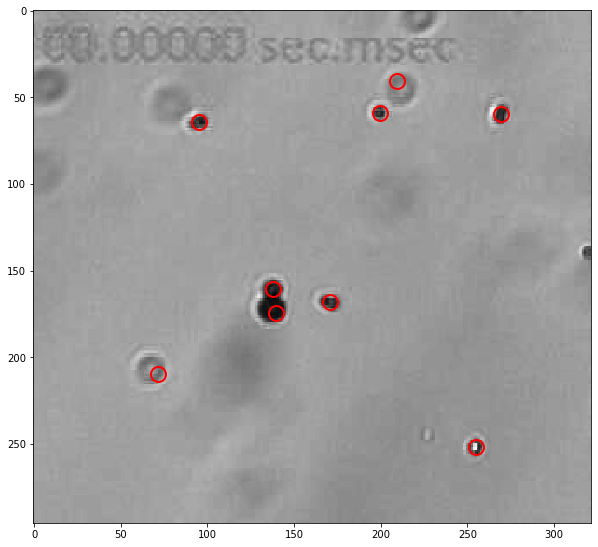

<AxesSubplot:>

In [14]:
##print image before manually dropping non-particles
plt.figure()
tp.annotate(f, frames[0])

In [55]:
##batch does tp.locate on each frame
f = tp.batch(frames[:192], 13, minmass=450, invert=True)

Frame 191: 20 features


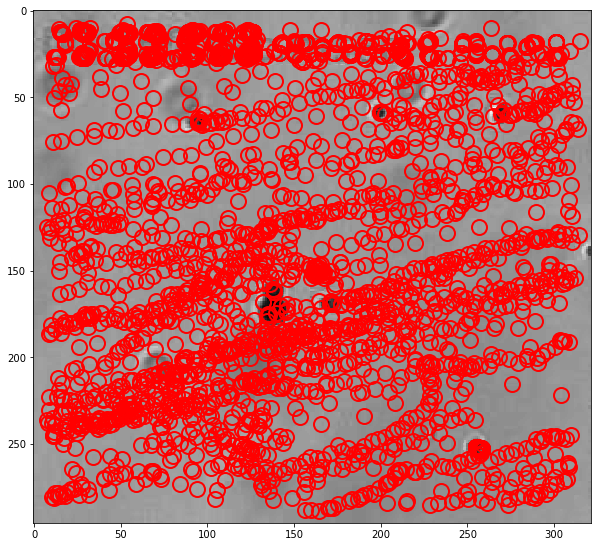

<AxesSubplot:>

In [56]:
plt.figure()
tp.annotate(f , frames[1])

[Text(0.5, 0, 'mass'), Text(0, 0.5, 'count')]

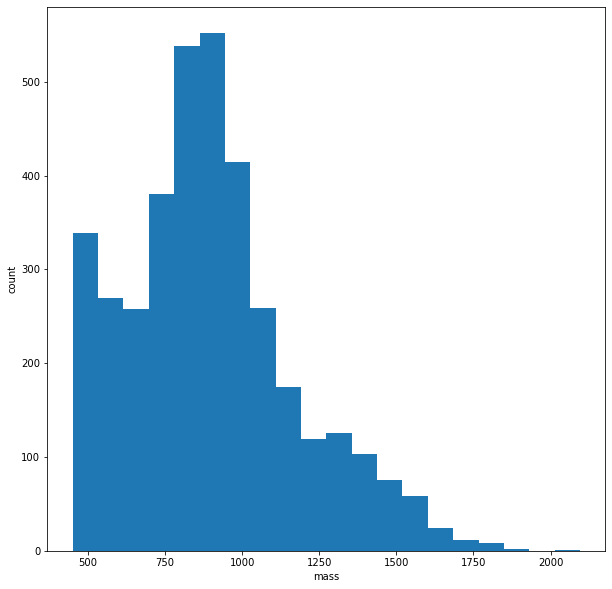

In [57]:
fig, ax = plt.subplots()
ax.hist(f['mass'], bins=20)
##plots the 'mass' of each detected particle
# Optionally, label the axes.
ax.set(xlabel='mass', ylabel='count')

In [61]:
##pass in f
## second parameter is maximum displacement
## third is the most frames a particle can disappear before it is forgotten from memory
t = tp.link_df(f, 10, memory=10)

Frame 191: 20 trajectories present.


pandas.core.frame.DataFrame

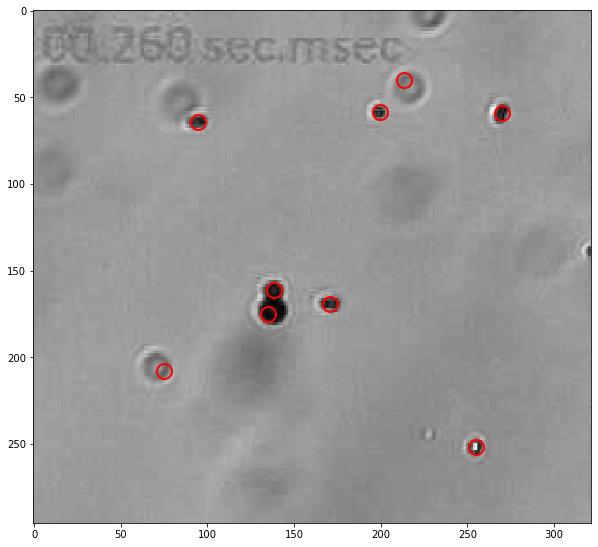

matplotlib.axes._subplots.AxesSubplot

In [68]:

plt.figure()
tp.annotate(f.loc[f['frame'] == 1] , frames[1])
    

In [41]:
t1 = tp.filter_stubs(t, 15)
# Compare the number of particles in the unfiltered and filtered data.
print('Before:', t['particle'].nunique())
print('After:', t1['particle'].nunique())

Before: 930
After: 14


<class 'pandas.core.frame.DataFrame'>


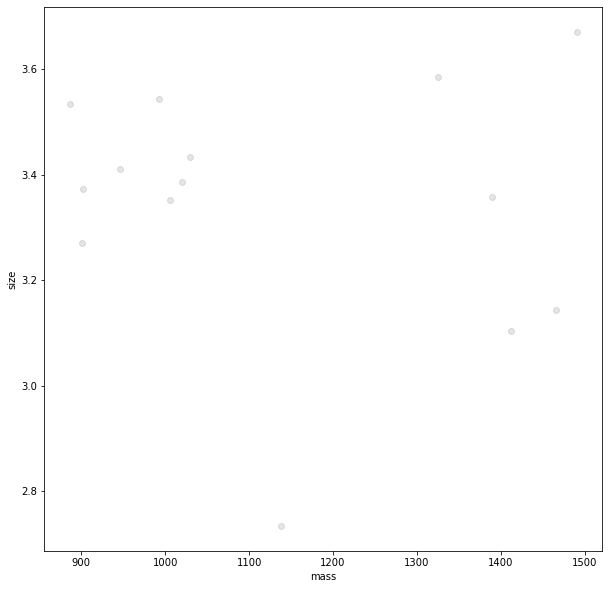

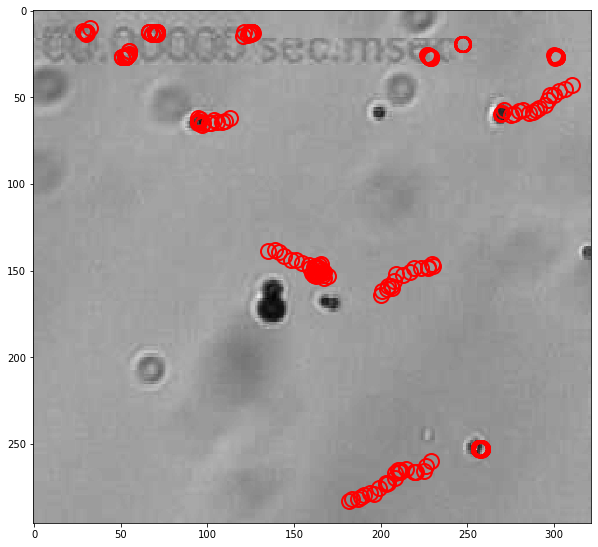

<AxesSubplot:>

In [42]:
print(type(t1))
#t1 = t1[(t1.y < 50) & (t1.x <250)].index
plt.figure()
tp.mass_size(t1.groupby('particle').mean())

plt.figure()
tp.annotate(t1,frames[0])

In [49]:
t1 = t1[(t1.y < 50)].index
t1

AttributeError: 'Int64Index' object has no attribute 'y'

In [45]:
condition = lambda x: ((x['mass'].mean() > 825) & (x['size'].mean() < 8) &
                       (x['ecc'].mean() > 0.1))
t2 = tp.filter(t1, condition)  # a wrapper for pandas' filter that works around a bug in v 0.12

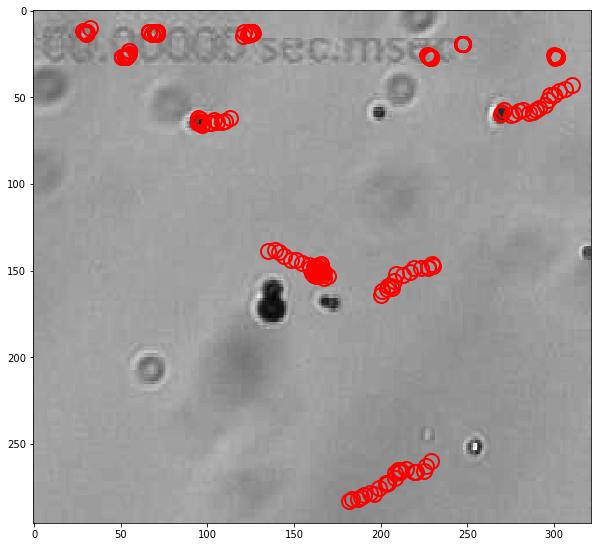

<AxesSubplot:>

In [46]:
plt.figure()
tp.annotate(t2,frames[0])

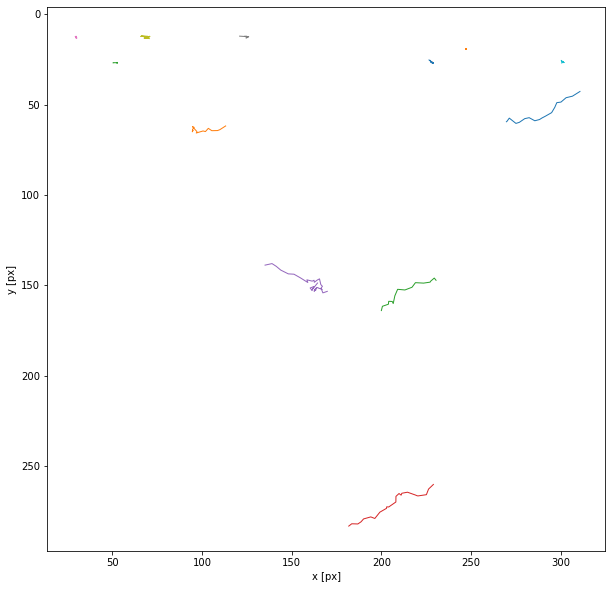

<AxesSubplot:xlabel='x [px]', ylabel='y [px]'>

In [47]:
plt.figure()
tp.plot_traj(t2)

In [260]:
d = tp.compute_drift(t1)

<AxesSubplot:xlabel='frame'>

<Figure size 720x720 with 0 Axes>

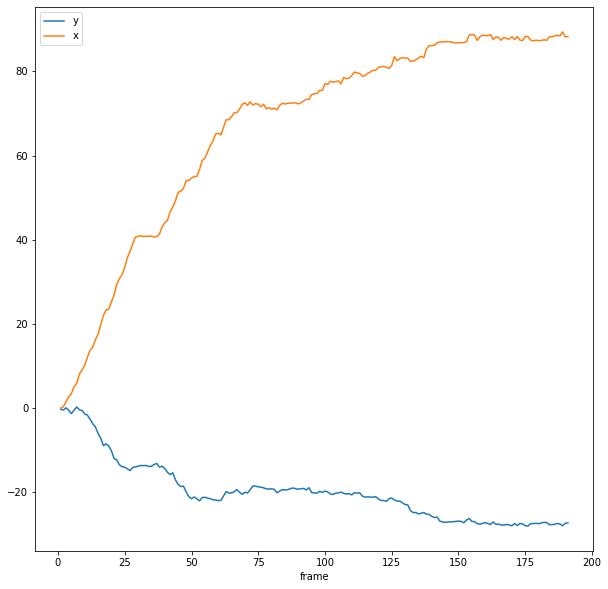

In [261]:
plt.figure()
d.plot()

In [263]:
tm = tp.subtract_drift(t2, d)

ValueError: cannot reindex from a duplicate axis